<a href="https://colab.research.google.com/github/cybertilla/Lab4/blob/main/Lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#First project: Training NN

Author: Bertilla Fabris

Date: 21 Feb 2024

In [ ]:
import torch
from torch import nn
from torch import optim
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
#drive.mount('/content/drive')

#load train ds
df_train = pd.read_csv('/content/drive/MyDrive/dataset/train.csv')
df_train.head()

#convert ds to tensor
x_train = torch.tensor(df_train['x'].values, dtype=torch.float32).unsqueeze(1)
y_train = torch.tensor(df_train['y'].values, dtype=torch.float32)

In [ ]:
#load test ds
df_test = pd.read_csv('/content/drive/MyDrive/dataset/test.csv')
df_test.head()

#convert ds to tensor
x_test = torch.tensor(df_test['x'].values, dtype=torch.float32).unsqueeze(1)
y_test = torch.tensor(df_test['y'].values, dtype=torch.float32)

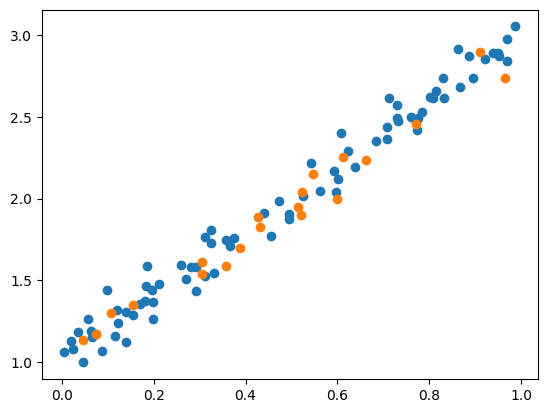

In [ ]:
#visualise
plt.scatter(x_train, y_train)
plt.scatter(x_test, y_test)

In [ ]:
#define model
model = nn.Linear(1,1)
model

Linear(in_features=1, out_features=1, bias=True)

In [ ]:
#define loss function
loss_fn = nn.MSELoss()

In [ ]:
#show parameters
model.parameters()

for name, param in model.named_parameters():
  print(name, param)

#choose optimizer
optimizer = optim.SGD(model.parameters(), lr=0.1)

weight Parameter containing:
tensor([[-0.5924]], requires_grad=True)
bias Parameter containing:
tensor([0.6358], requires_grad=True)


In [ ]:
#epochs declaration
N = 500
#create empty list for saving loss history
loss_hist = []

#save data over reps
for iter in range(N):
  yp = model(x_train)
  loss = loss_fn(yp.squeeze(), y_train)
  loss.backward()
  optimizer.step()
  optimizer.zero_grad()
  loss_hist.append(loss.item())

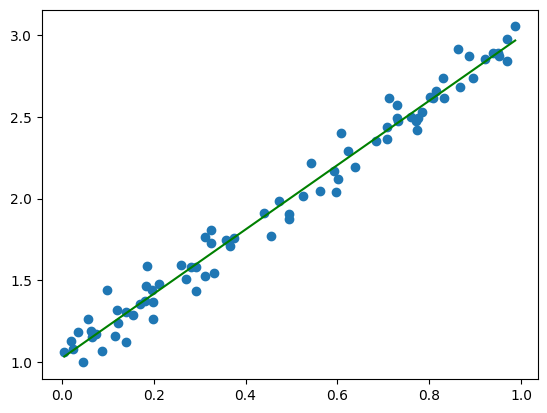

In [ ]:
#visualise
x_vis = torch.linspace(x_train.min(), x_train.max(), 100).unsqueeze(1)
y_vis = model(x_vis)

plt.scatter(x_train, y_train)
plt.plot(x_vis.detach(), y_vis.detach(), 'g')

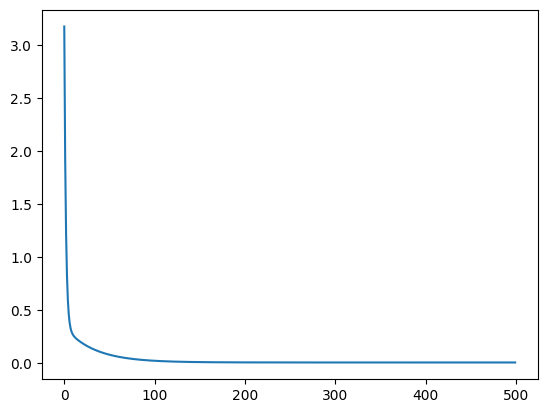

In [ ]:
plt.plot(range(N), loss_hist)

In [ ]:
import torch.nn.functional as F

yp = model(x_test)
l1_loss = F.l1_loss(yp.squeeze(), y_test)
print(l1_loss)

tensor(0.0736, grad_fn=<MeanBackward0>)


#Second project: training a CNN

Author: Bertilla Fabris

Date: 21 Feb, finished on 23 Feb

In [13]:
from torch.utils.data import Dataset, DataLoader
import torchvision

#import train dataset
training_data = torchvision.datasets.CIFAR10(
    root='./data',
    train=True,
    download=True
)

Files already downloaded and verified


In [14]:
#import test dataset
testing_data = torchvision.datasets.CIFAR10(
    root='./data',
    train=False,
    download=True
)

Files already downloaded and verified


Label:  1


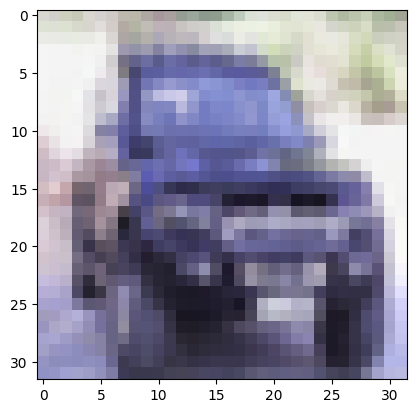

In [15]:
import matplotlib.pyplot as plt

#checking the test dataset
image, label = testing_data[9]
plt.imshow(image)
print('Label: ', label)

In [43]:
from torchvision.transforms import ToTensor
#transform train ds to tensors
training_data = torchvision.datasets.CIFAR10(
    root = './data',
    train = True,
    transform=ToTensor()
)

In [44]:
#tranform test ds to tensors
testing_data = torchvision.datasets.CIFAR10(
    root = './data',
    train = False,
    transform=ToTensor()
)

In [45]:
#batch size declaration
batch_size = 64
#building data loaders
train_dataloader = DataLoader(training_data, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(testing_data, batch_size=batch_size, shuffle=True)

In [46]:
for image, labels in train_dataloader:
    print(labels.shape)
    print(image.shape)
    break
#note: this is just a check for correct size: batch, channels and img sizes

torch.Size([64])
torch.Size([64, 3, 32, 32])


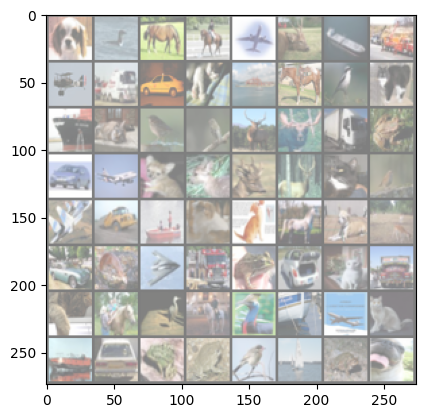

In [24]:
import numpy as np
import matplotlib.pyplot as plt

classes = ("planes", "car", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck")

#display img with following function
def imshow(img):
  img = img / 2 + 0.5
  np_img = img.numpy()
  transposed = np.transpose(np_img, (1, 2, 0))
  plt.imshow(transposed)
  plt.show()


iterator = iter(train_dataloader)
images, labels = next(iterator)


imshow(torchvision.utils.make_grid(images))
#note: similar function names can be ineffective since library reserves keywords

In [49]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using the {device} device")

Using the cpu device


In [57]:
import torch.nn as nn
import torch.nn.functional as F

#define layers and ReLu activation (forward)
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()
print(net)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [68]:
import torch.optim as optim
import torch.nn as nn

#criterion == loss function
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [69]:
N = 20

for epoch in range(N):
    running_loss = 0.0

    for i, data in enumerate(train_dataloader, 0):
        inputs, labels = data
        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    # print epoch and data size
    print(f"Epoch: {epoch}, Number of images: {i}, Loss: {running_loss}")

print("Finished training!")

#note: minor modification to previous cell applied after reading https://stackoverflow.com/questions/56783182/runtimeerror-the-size-of-tensor-a-133-must-match-the-size-of-tensor-b-10-at
#code is now working

Epoch: 0, number of images: 781, Loss: 1134.730077624321
Epoch: 1, number of images: 781, Loss: 1100.1503384113312
Epoch: 2, number of images: 781, Loss: 1063.3919775485992
Epoch: 3, number of images: 781, Loss: 1039.4506937861443
Epoch: 4, number of images: 781, Loss: 1009.9180588722229
Epoch: 5, number of images: 781, Loss: 989.8613529205322
Epoch: 6, number of images: 781, Loss: 970.9664620161057
Epoch: 7, number of images: 781, Loss: 951.1028032302856
Epoch: 8, number of images: 781, Loss: 935.3932435512543
Epoch: 9, number of images: 781, Loss: 918.2482363581657
Epoch: 10, number of images: 781, Loss: 902.4077642560005
Epoch: 11, number of images: 781, Loss: 886.8383466005325
Epoch: 12, number of images: 781, Loss: 874.1571714282036
Epoch: 13, number of images: 781, Loss: 858.76347386837
Epoch: 14, number of images: 781, Loss: 846.0005371570587
Epoch: 15, number of images: 781, Loss: 835.2679365873337
Epoch: 16, number of images: 781, Loss: 819.5169612765312
Epoch: 17, number of i

In [72]:
#evaluate model
correct = 0
total = 0

with torch.no_grad():
    for data in test_dataloader:
        images, labels = data

        outputs = net(images)

        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Network's accuracy is: {100 * correct // total}%")

Network's accuracy is: 61%


In [56]:
torch.save(net.state_dict(), "model.pth")
print("Saved pythorch model state to model.pth")

Saved pythorch model state to model.pth
